### EXPLORATORY DATA  ANALYSIS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('./master.csv')
X = dataset.drop(['suicides/100k pop', 'suicides_no', 'country-year'], axis=1) #delete some "duplicate" features
y = dataset['suicides/100k pop']

In [3]:
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
dataset["generation"].value_counts()


Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

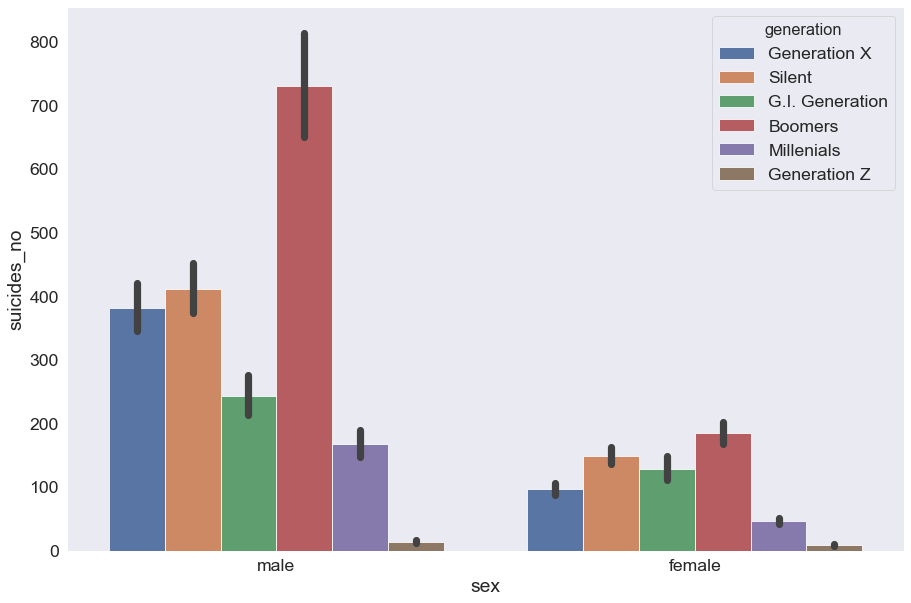

In [163]:
sns.barplot(x='sex', y='suicides_no', hue='generation', data=dataset);


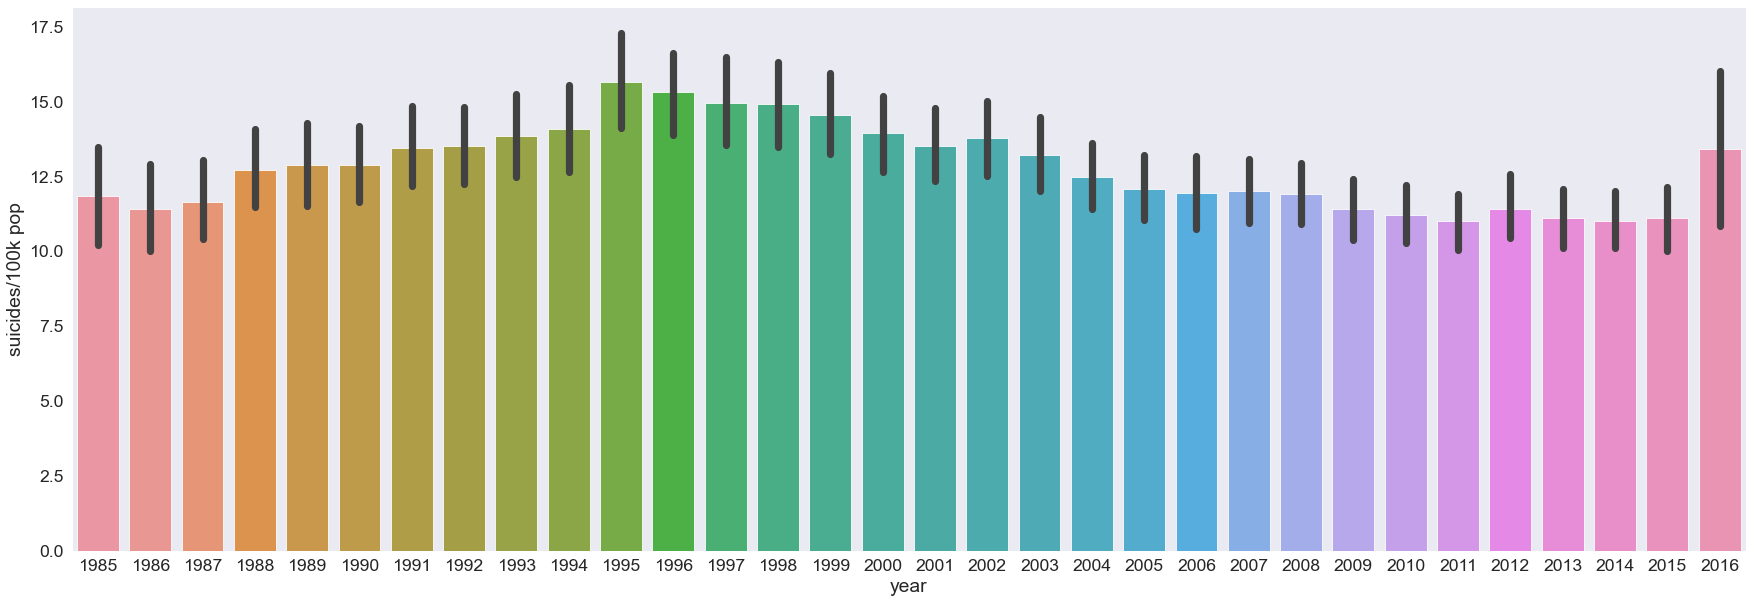

In [145]:
#no. of suicides per 100k from 1985 to 2016
plt.figure(figsize=(30,10))
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.barplot(data=dataset,x='year',y='suicides/100k pop')



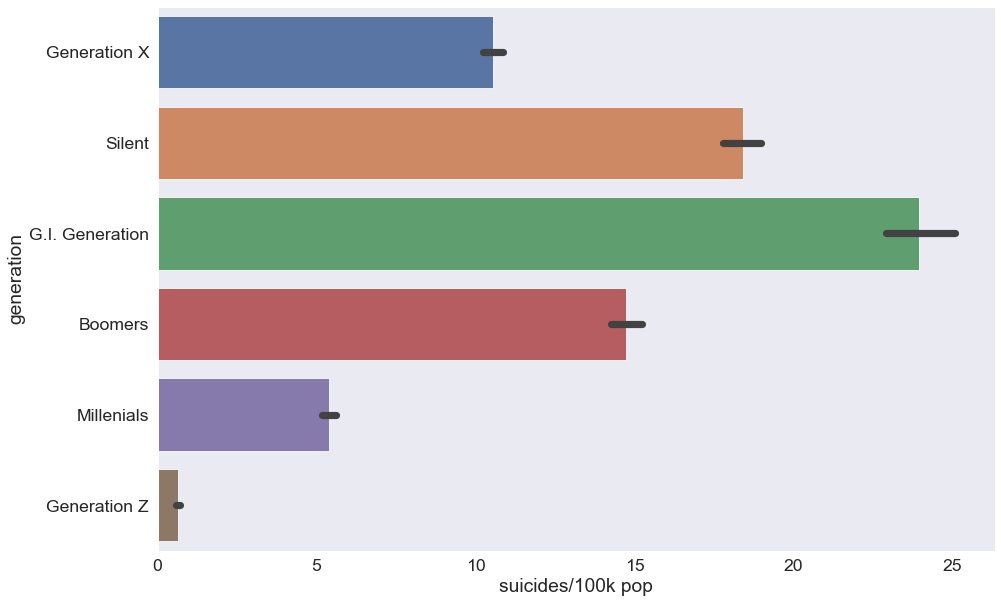

In [164]:
#no. of suicides per 100k population based on generation
sns.barplot(x='suicides/100k pop', y='generation', data=dataset);


Text(0, 0.5, 'suicides_no')

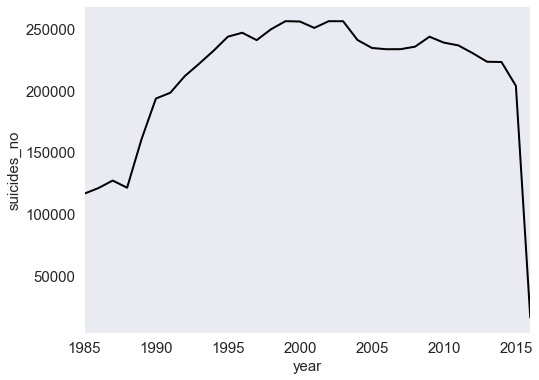

In [165]:
#Curve of No_of_Suicides
ns = dataset['suicides_no'].groupby(dataset.year).sum()
ns.plot(figsize=(8,6), linewidth=2, fontsize=15,color='black')
plt.xlabel('year', fontsize=15)
plt.ylabel('suicides_no',fontsize=15)

#This shows a decreasing curve of suicides

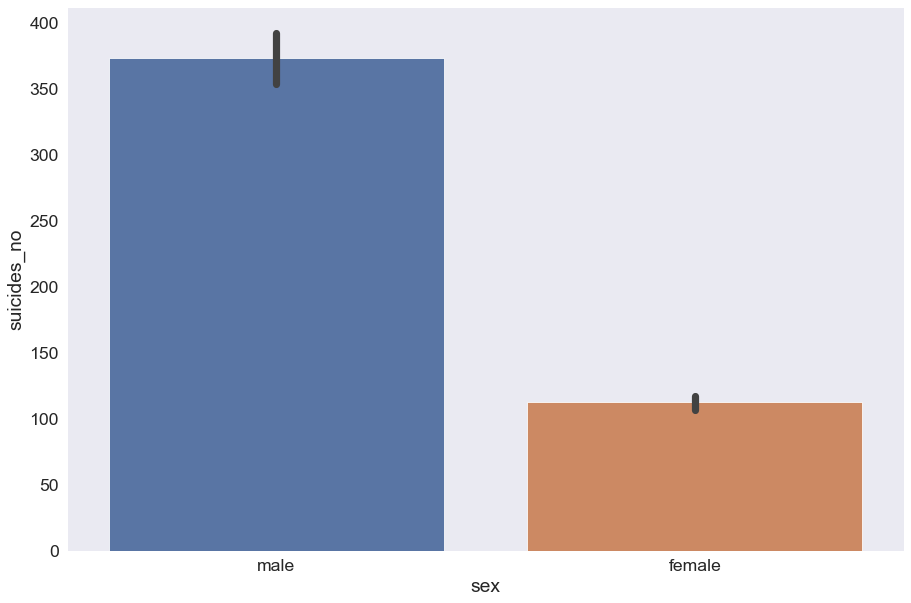

In [166]:
sns.barplot(x='sex',y='suicides_no',data=dataset)


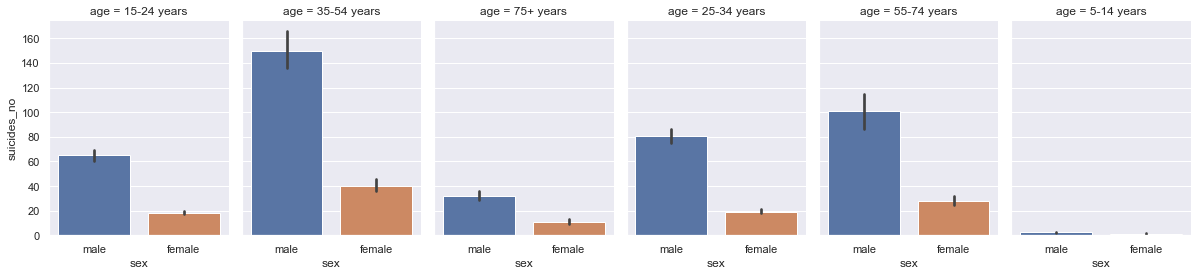

In [98]:
#For male and female, and different age groups
sns.catplot(x='sex', y='suicides_no',col='age', data=dataset, estimator=np.median,height=4, aspect=.7,kind='bar')


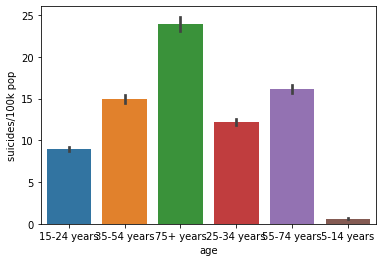

In [17]:
sns.barplot(x='age',y='suicides/100k pop',data=dataset)


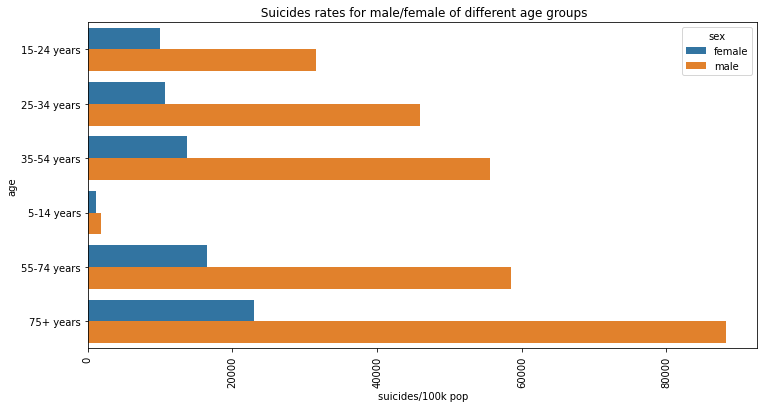

In [15]:
plt.figure(figsize=(12, 6));
Age_Country = pd.DataFrame(dataset.groupby(['age','sex'],sort=True)['suicides/100k pop'].sum()).reset_index()
plot1 = Age_Country.sort_values(by=['suicides/100k pop','age'], ascending=False)
plot1.reset_index()
g = sns.barplot(x='suicides/100k pop', y='age', data=Age_Country, hue = 'sex');
plt.xticks(rotation=90)

plt.title(' Suicides rates for male/female of different age groups');

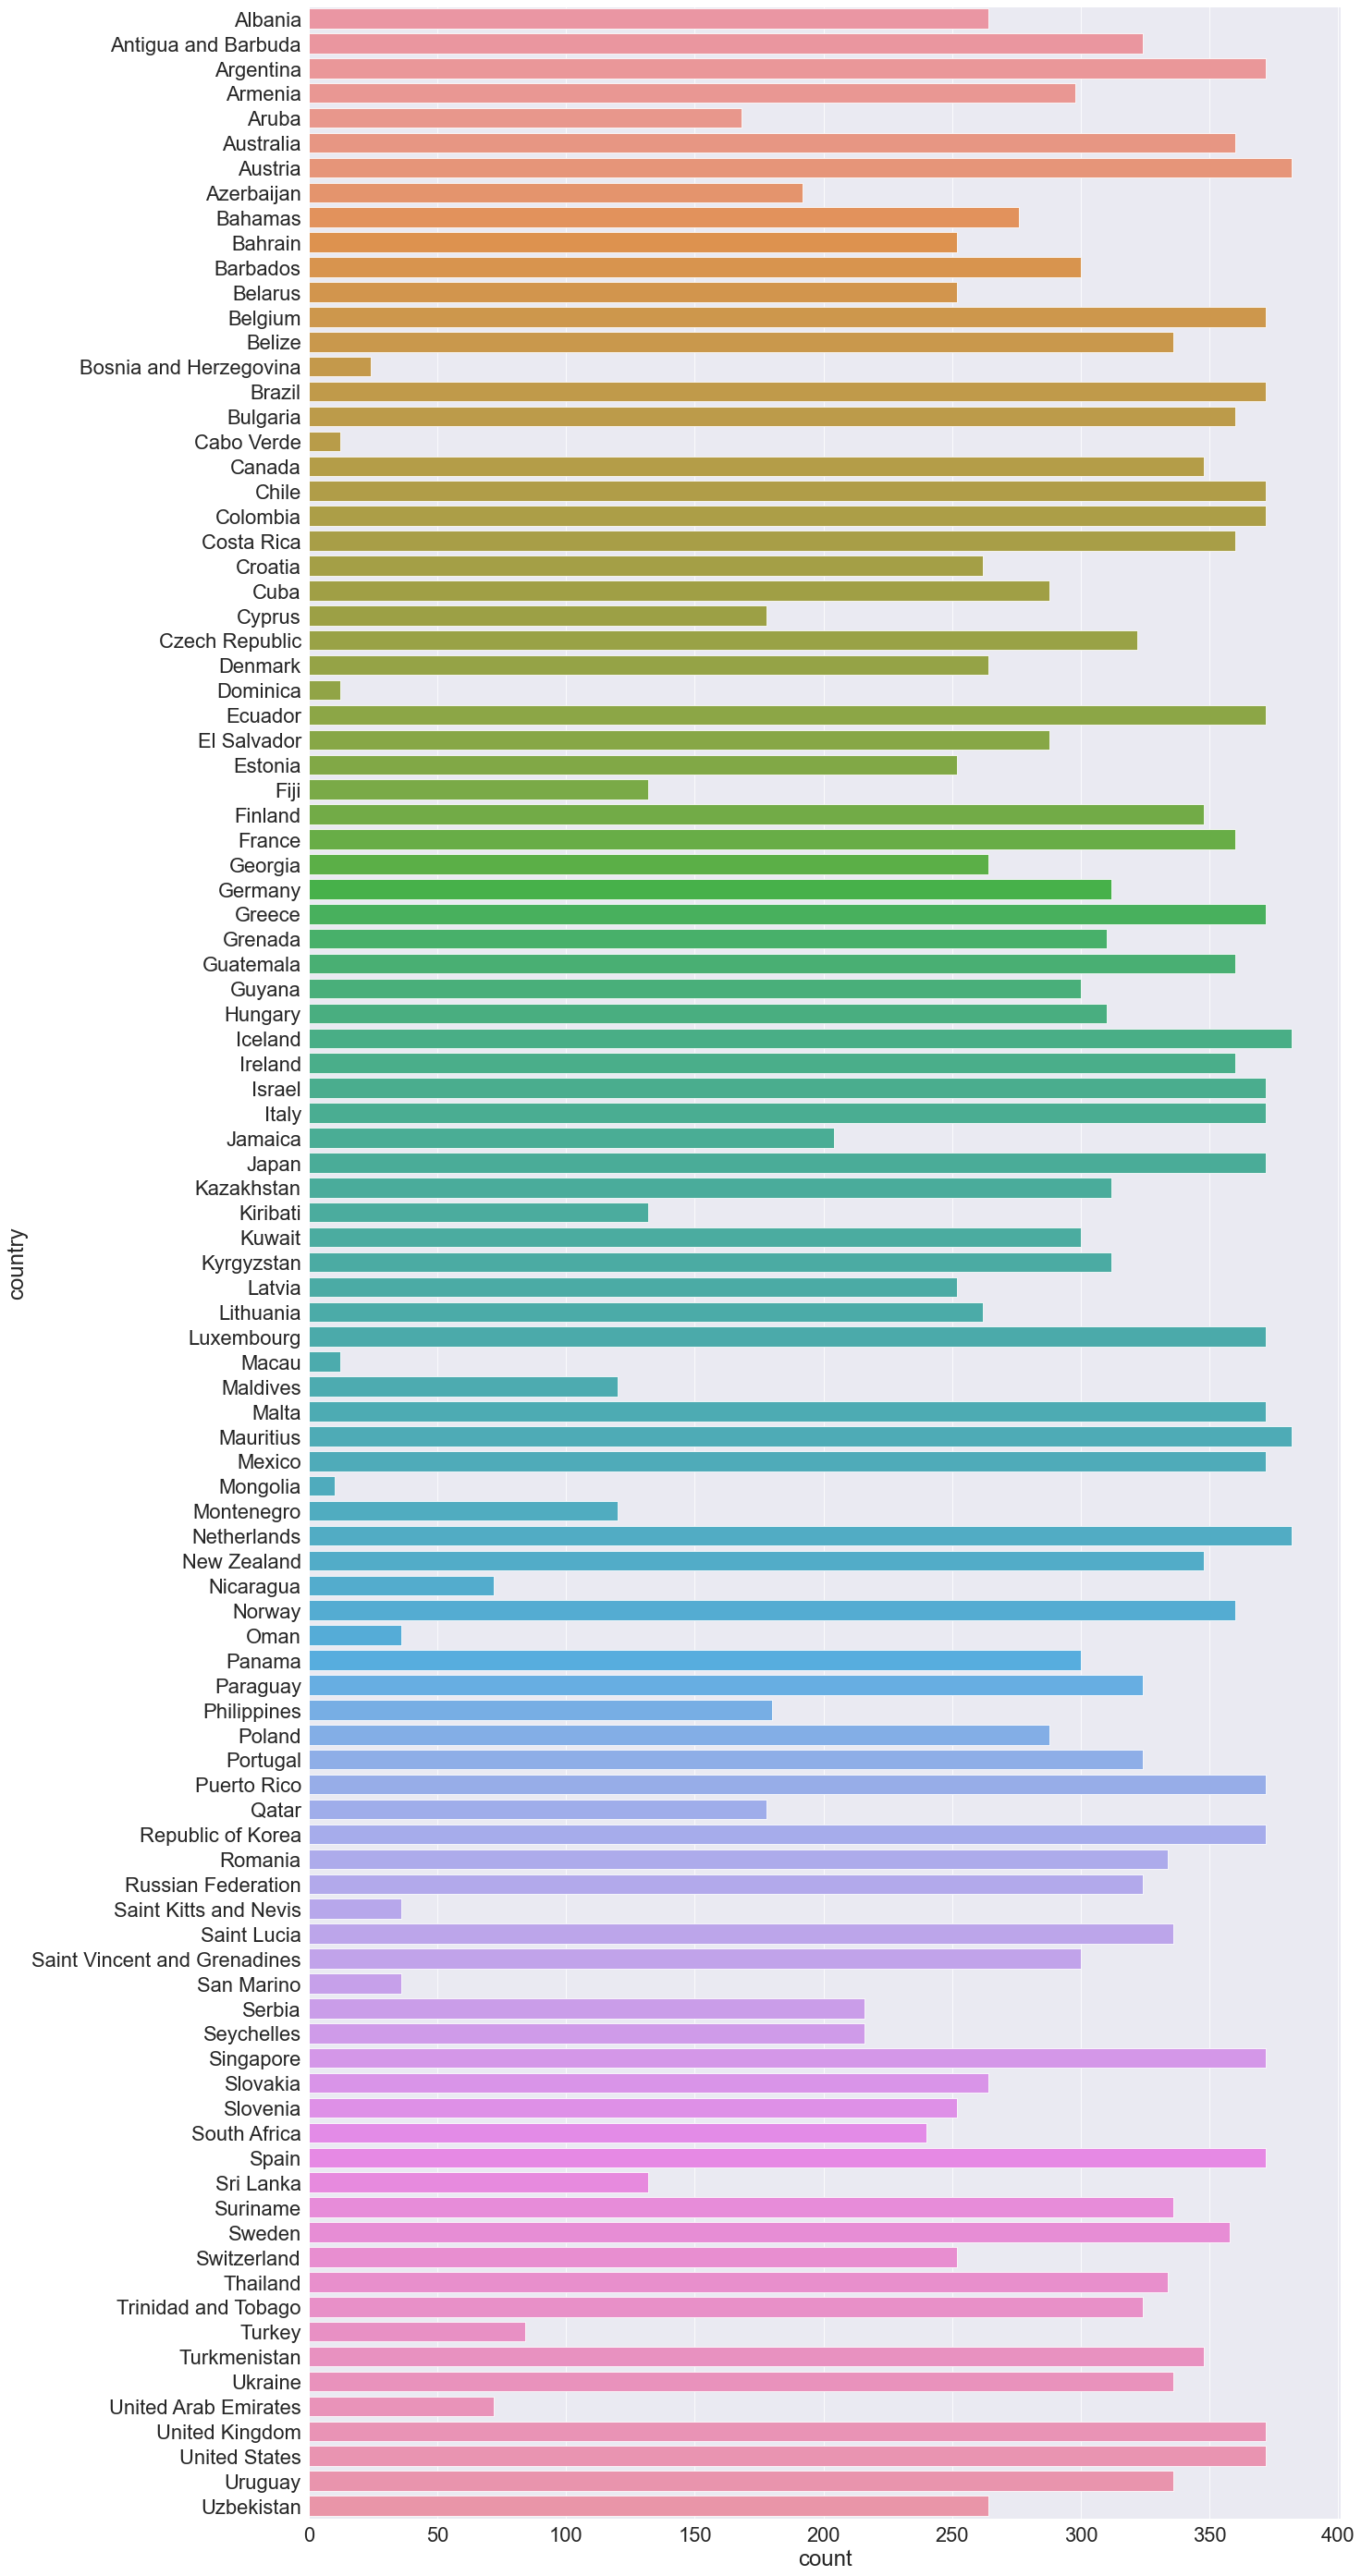

In [100]:
# SHOWING THE DATA OF EACH COUNTRY (Not no. of suicides)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,50))
y = dataset['country']
sns.set_context("paper", 2.5, {"lines.linewidth": 4})
sns.countplot(y=y,label='count')

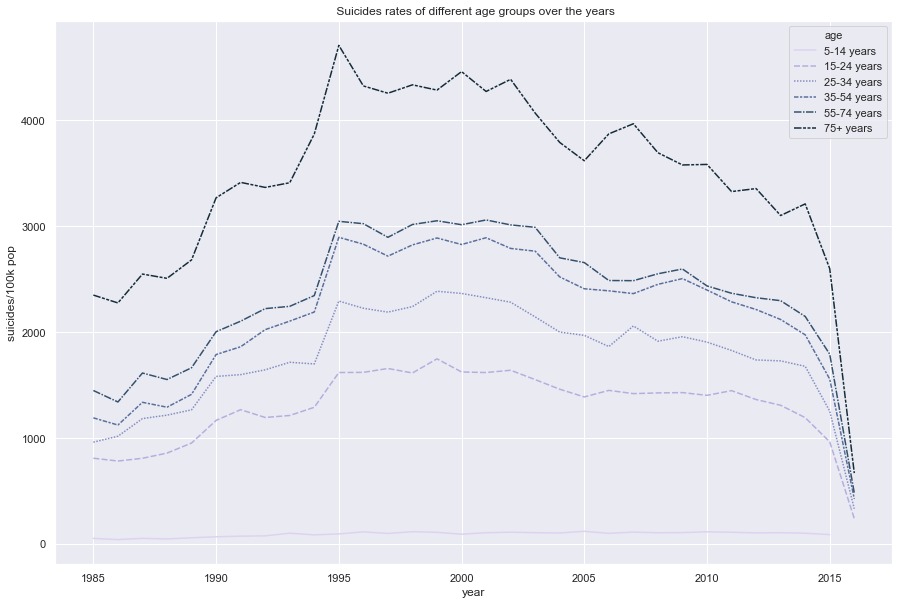

In [29]:
from matplotlib.colors import LogNorm
timeseries = pd.DataFrame(dataset.groupby(['year','age'])['suicides/100k pop'].sum()).reset_index()
timeseries['age'] = timeseries.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides/100k pop',hue='age',style='age',data=timeseries,hue_norm=LogNorm(),palette="ch:2.5,.25",sort=False)
plt.title(' Suicides rates of different age groups over the years');

In [167]:
y

0        6.71
1        5.19
2        4.83
3        4.59
4        3.28
         ... 
27815    2.96
27816    2.58
27817    2.17
27818    1.67
27819    1.46
Name: suicides/100k pop, Length: 27820, dtype: float64

In [168]:
X[' gdp_for_year ($) '] = X[' gdp_for_year ($) '].str.replace(',', '').astype(float)

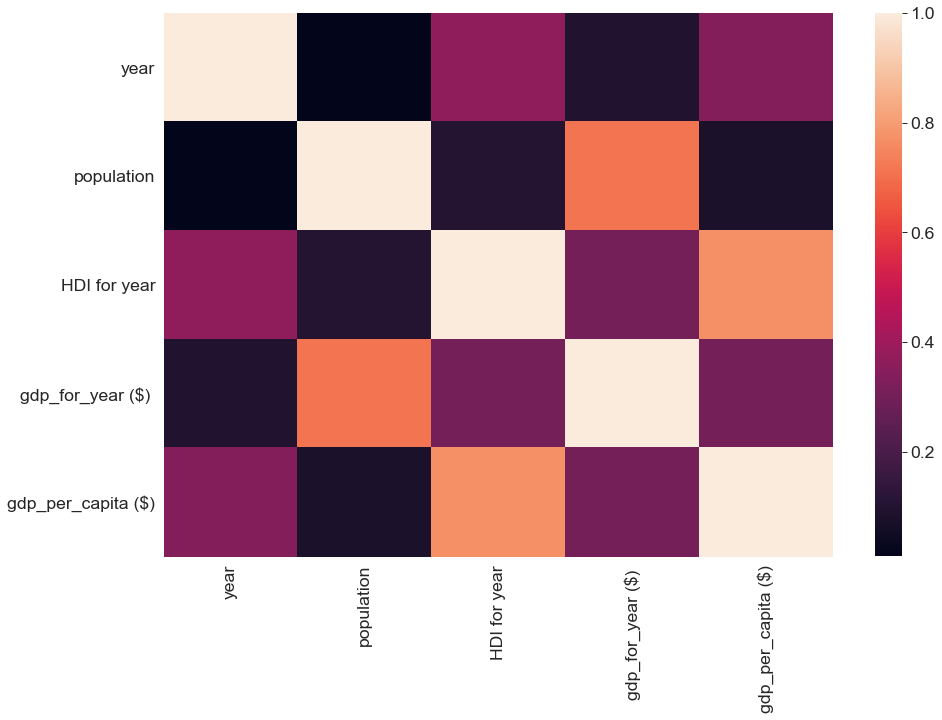

In [169]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

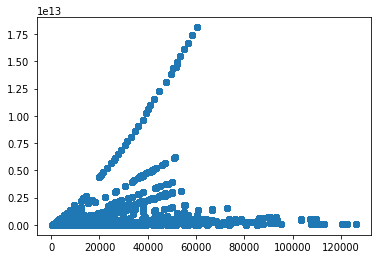

In [5]:
plt.scatter(X['gdp_per_capita ($)'], X[' gdp_for_year ($) '])

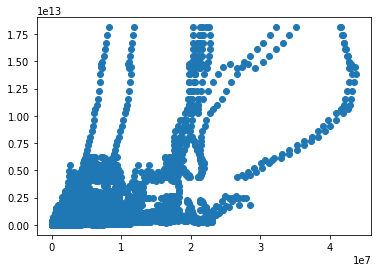

In [6]:
plt.scatter(X['population'], X[' gdp_for_year ($) '])

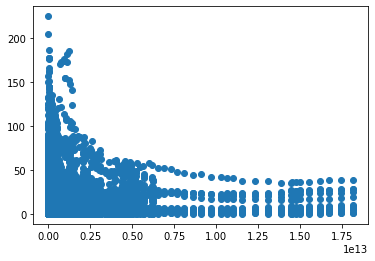

In [7]:
plt.scatter(X[' gdp_for_year ($) '], y)

In [170]:
X = X[y < 125]
y = y[y < 125]

### FEATURE ENGINEERING

In [171]:
numeric_features = ['year','HDI for year', ' gdp_for_year ($) ', 'population',
                   'gdp_per_capita ($)']
categorical_features = ['country', 'sex', 'age', 'generation']

In [172]:
from sklearn.compose import ColumnTransformer

In [173]:
X

,country,year,sex,age,population,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,312900,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,308000,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,289700,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,21800,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,274300,NaN,2.156625e+09,796,Boomers
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,3620833,0.675,6.306708e+10,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,348465,0.675,6.306708e+10,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,2762158,0.675,6.306708e+10,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,2631600,0.675,6.306708e+10,2309,Generation Z


In [174]:
categorical_features

['country', 'sex', 'age', 'generation']

In [175]:
from collections import Counter, defaultdict

In [176]:
from sklearn.svm import SVR

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, OneHotEncoder, StandardScaler
numeric_transformer = Pipeline(steps=[
    ('imputer', Imputer(missing_values='NaN', strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVR())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


C:\Users\hasmi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [180]:
clf2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

In [181]:
clf3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor())])

In [182]:
model = clf.fit(X_train,y_train)

C:\Users\hasmi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\hasmi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [183]:
model2 = clf2.fit(X_train,y_train)

C:\Users\hasmi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [184]:
model3 = clf3.fit(X_train,y_train)

C:\Users\hasmi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\hasmi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [185]:
y_pred_test = model.predict(X_test)

In [204]:
y_pred_test2 = model2.predict(X_test)

In [205]:
y_pred_test3 = model3.predict(X_test)

In [206]:
from sklearn.metrics import mean_squared_error
rms_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [207]:
rms_test2 = np.sqrt(mean_squared_error(y_test, y_pred_test2))

In [208]:
rms_test3 = np.sqrt(mean_squared_error(y_test, y_pred_test3))

In [209]:
print("SVM RMS Value: "+str(rms_test))
print("Linear Regression RMS Value: "+str(rms_test2))
print("Random Forest RMS Value: "+str(rms_test3))

SVM RMS Value: 15.48396759687091
Linear Regression RMS Value: 12.358634913567636
Random Forest RMS Value: 5.766325720614945


### 2021 Prediction

In [257]:
us2020 = X_test.iloc[0:0]


In [277]:
us2020

,country,year,sex,age,population,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,United States,2021,male,15-24 years,21810000,0.92,3.180000e+11,62794,Generation Z
1,United States,2021,female,15-24 years,10459373,0.92,3.180000e+11,62794,Generation Z
2,United States,2021,male,15-24 years,21810000,0.92,3.180000e+11,62794,Generation Z
3,United States,2021,female,15-24 years,10459373,0.92,3.180000e+11,62794,Generation Z
4,United States,2021,male,15-24 years,21810000,0.92,3.180000e+11,62794,Generation Z
5,United States,2021,female,15-24 years,10459373,0.92,3.180000e+11,62794,Generation Z
6,United States,2021,male,15-24 years,21810000,0.92,3.180000e+11,62794,Generation Z
7,United States,2021,female,15-24 years,10459373,0.92,3.180000e+11,62794,Generation Z


In [273]:
us2020.loc[len(us2020)] = [ 'United States',2021, 'male', "15-24 years", 21810000, 0.920, 3.18e+11 ,62794, "Generation Z" ]

C:\Users\hasmi\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [274]:
print("2021 Prediciton for Males under 15-24 years: "+str(model3.predict(us2020)[0]))

2021 Prediciton for Males under 15-24 years: 10.642999999999997


In [275]:
us2020.loc[len(us2020)] = [ 'United States',2021, 'female', "15-24 years", 10459373, 0.920, 3.18e+11 ,62794, "Generation Z" ]

C:\Users\hasmi\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [276]:
print("2021 Prediciton for Females under 15-24 years: "+str(model3.predict(us2020)[1]))

2021 Prediciton for Females under 15-24 years: 3.8269999999999995


### Age

In [36]:
age_labels = list(dataset['age'].unique())

In [37]:
age_labels

['15-24 years',
 '35-54 years',
 '75+ years',
 '25-34 years',
 '55-74 years',
 '5-14 years']

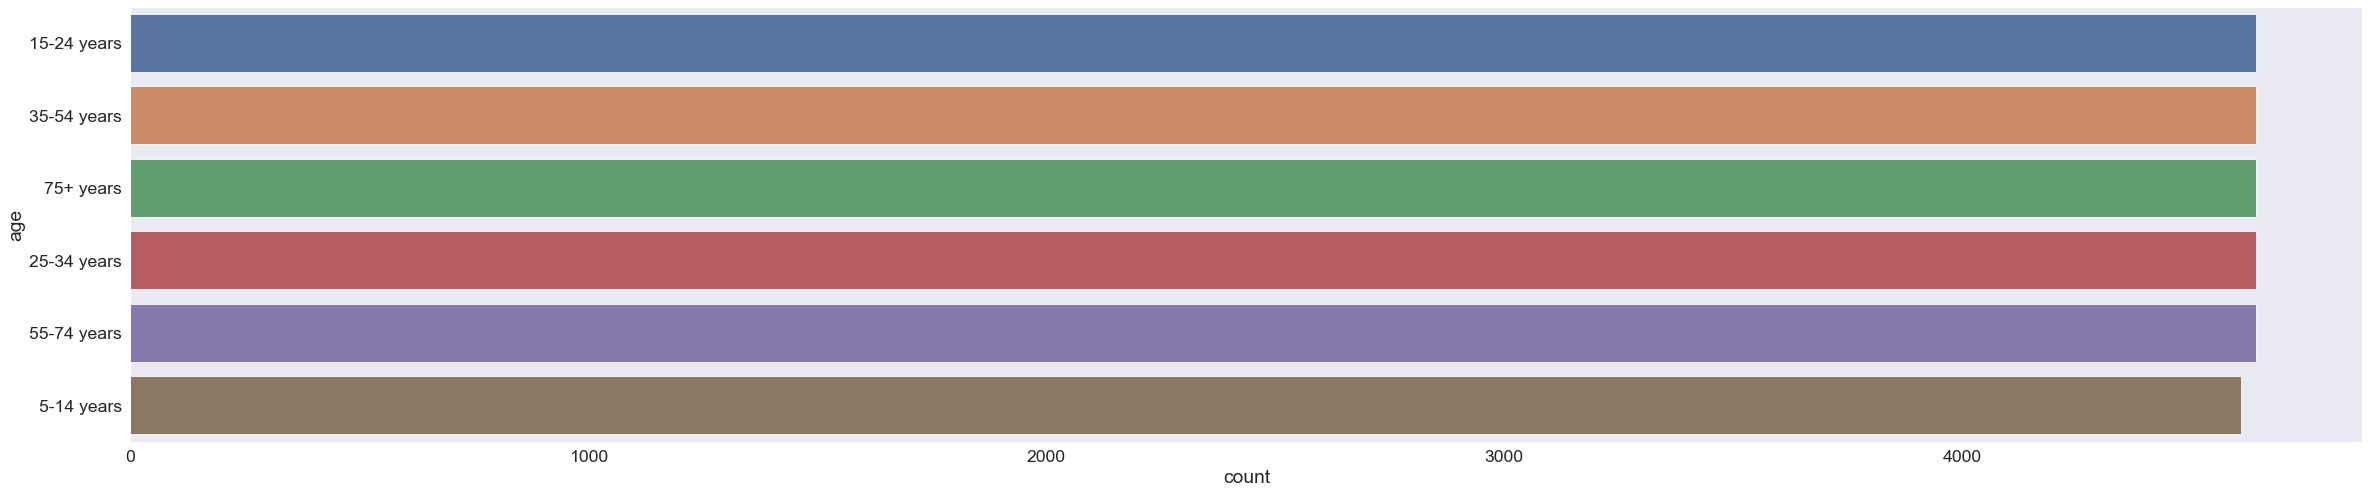

In [155]:
figure = plt.figure(figsize=(40,8))
ax = sns.countplot(y=dataset['age'], data=dataset)

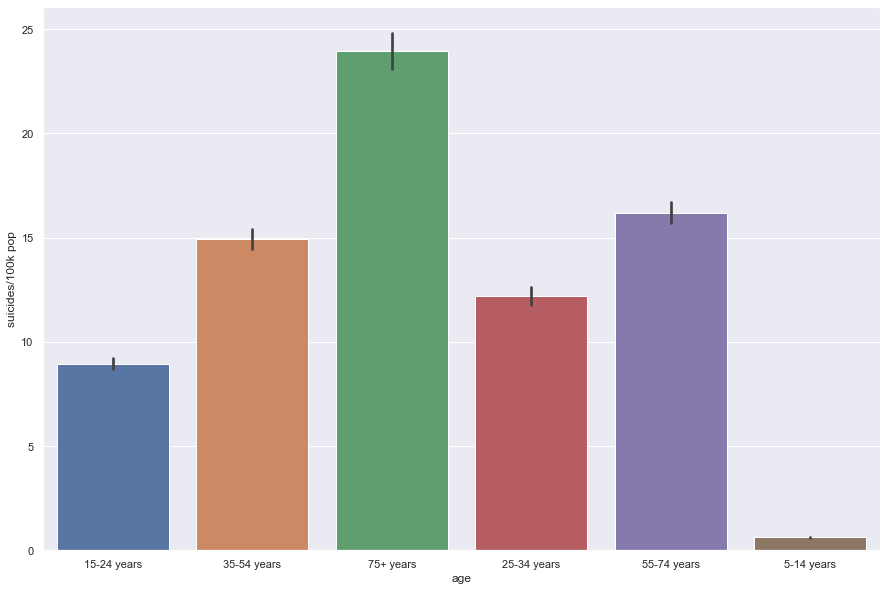

In [42]:
sns.barplot(x='age',y='suicides/100k pop',data=dataset)

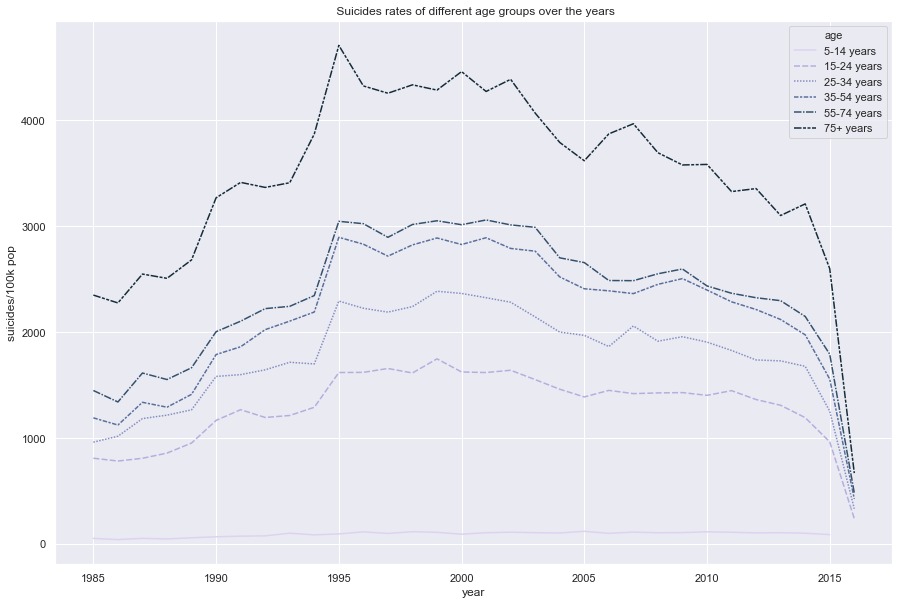

In [31]:
from matplotlib.colors import LogNorm
timeseries = pd.DataFrame(dataset.groupby(['year','age'])['suicides/100k pop'].sum()).reset_index()
timeseries['age'] = timeseries.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides/100k pop',hue='age',style='age',data=timeseries,hue_norm=LogNorm(),palette="ch:2.5,.25",sort=False)
plt.title(' Suicides rates of different age groups over the years');

### India

In [33]:
df = pd.read_csv("./Suicides_in_India.csv")

In [34]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0


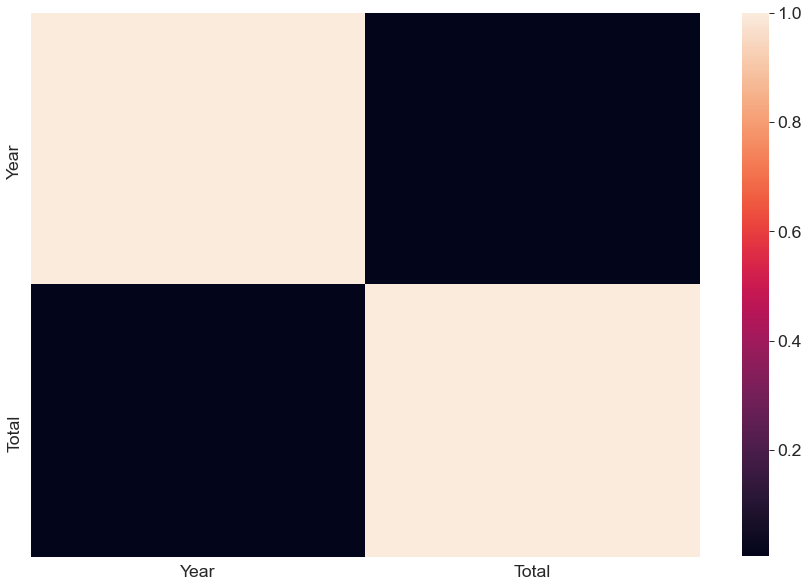

In [152]:
#correlations
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

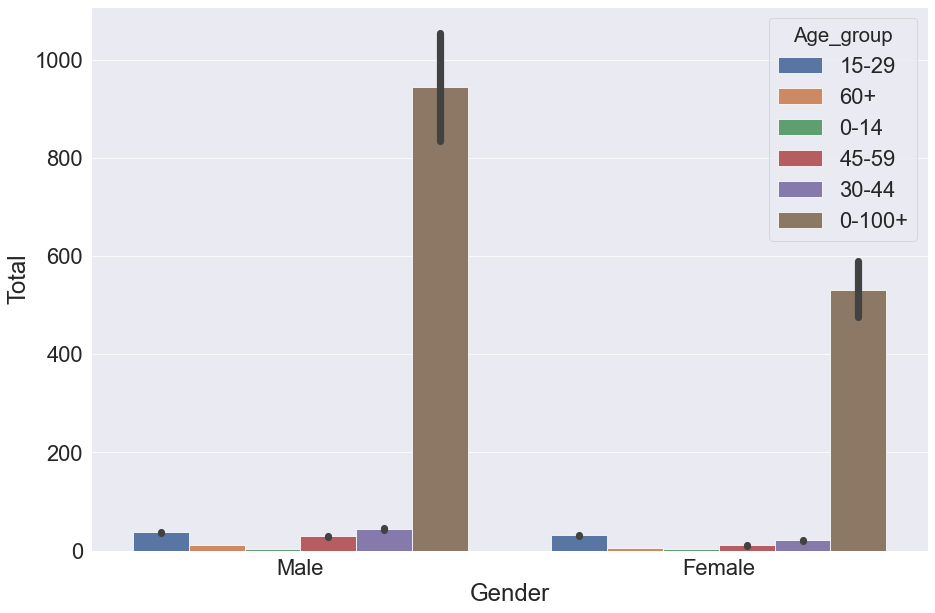

In [116]:
#Suicides for male and female for different age groups
sns.barplot(x='Gender', y='Total', hue='Age_group', data=df);


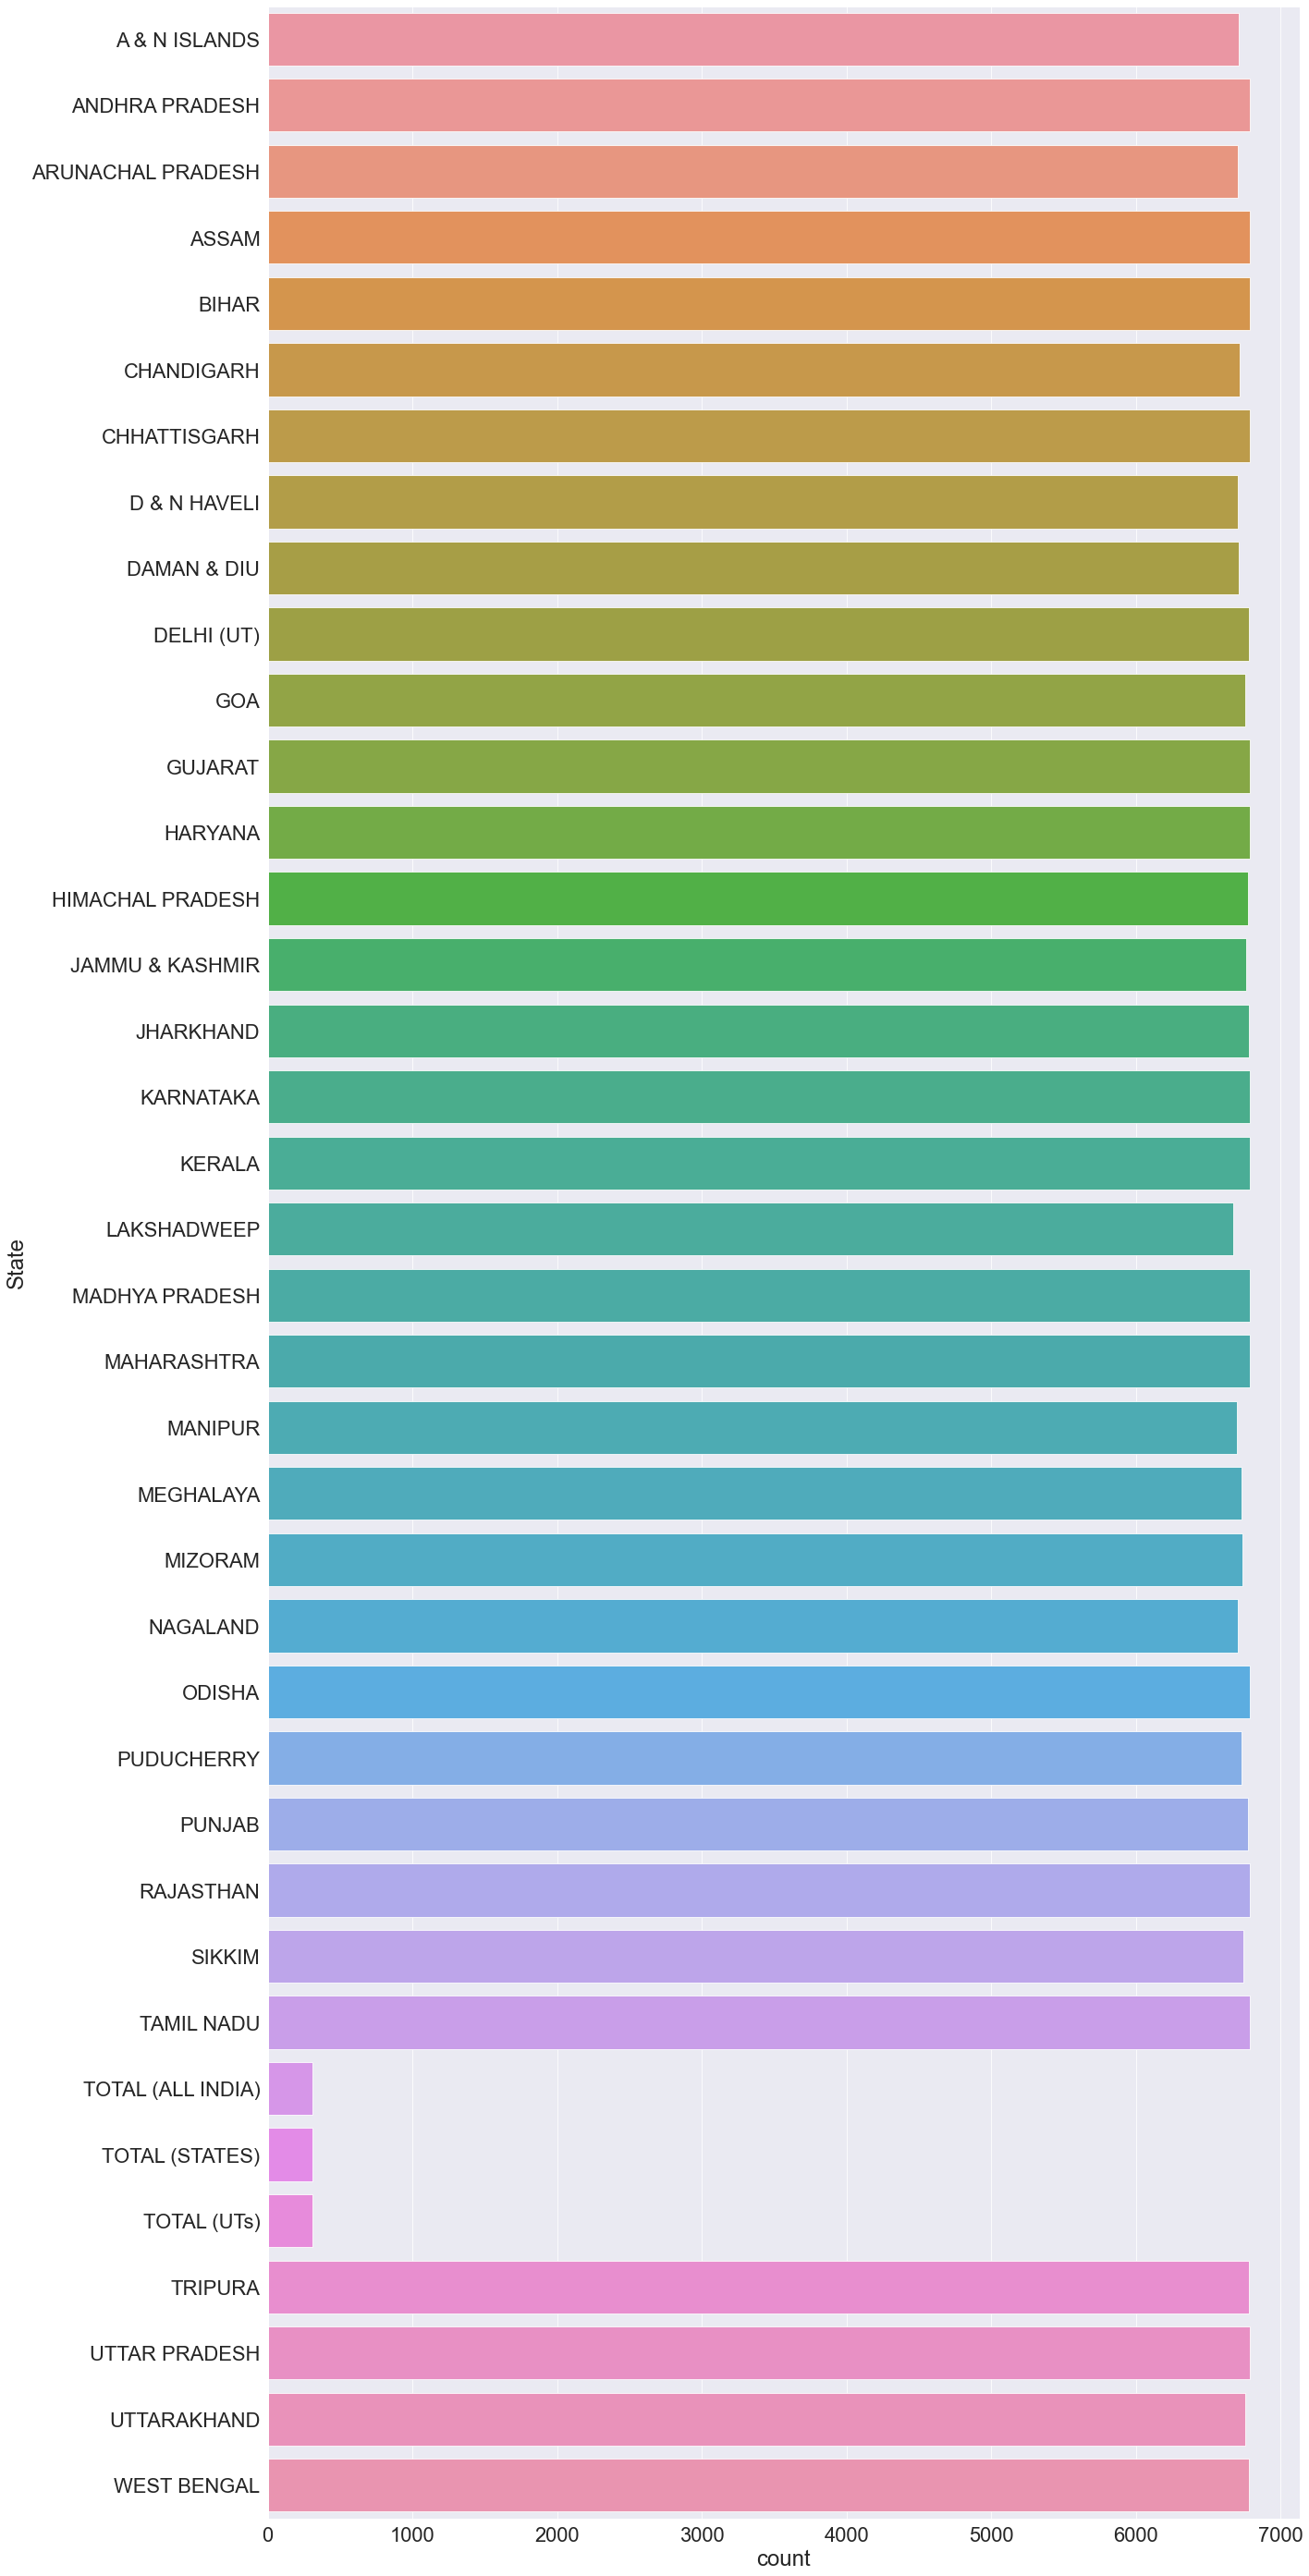

In [121]:
plt.figure(figsize=(20,50))
y = df['State']
sns.set_context("paper", 2.5, {"lines.linewidth": 4})
sns.countplot(y=y,label='count')

In [37]:
eduDf = df[df['Type_code']=='Education_Status']
causesDf = df[df['Type_code']=='Causes']
meansDf = df[df['Type_code']=='Means_adopted']
profDf = df[df['Type_code']=='Professional_Profile']
socialDf = df[df['Type_code']=='Social_Status']

C:\Users\hasmi\Anaconda3\lib\site-packages\pandas\core\generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\hasmi\Anaconda3\lib\site-packages\pandas\core\generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


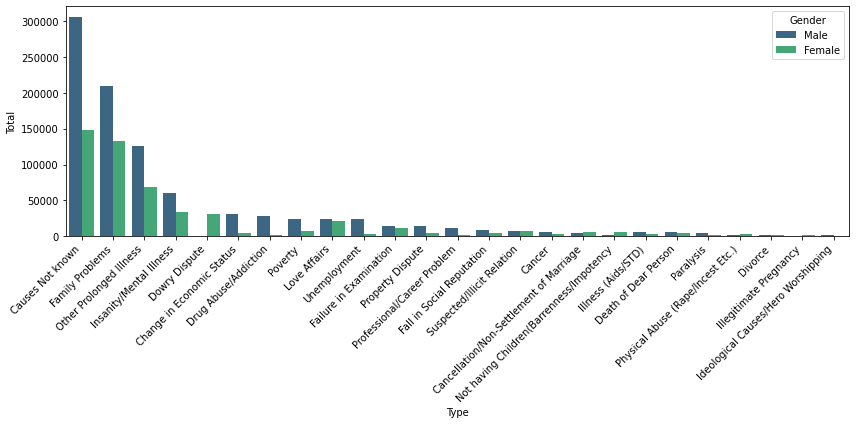

In [41]:
causesDf.is_copy = False
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic Status','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Other Causes (Please Specity)','Type'] = 'Causes Not known'
causesDf.loc[causesDf['Type']=='Not having Children (Barrenness/Impotency','Type'] = 'Not having Children(Barrenness/Impotency'
plt.figure(figsize=(12,6))
causesDf = causesDf[['Type','Gender','Total']]
causesSort = causesDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=causesSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

### Sentiment Analysis

In [5]:
tweet_data =  pd.read_csv("./tweets.csv", encoding ='latin1')

In [6]:
tweet_data.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1335769439392821250,@_thatbitch1111_ no- infp is basically- u need...,tw: edtwt shtwt,bunnixi_,2020-12-07T02:13:46.000Z,Mon Dec 07 02:13:46 +0000 2020,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Reply,NaN,0,1,NaN,NaN,NaN,NaN,NaN
1,1335769425983705090,@lilsadmeme HAHAHAHAHHAHAHAHAH,Ismail ????????,depressed_AFC,2020-12-07T02:13:43.000Z,Mon Dec 07 02:13:43 +0000 2020,0,0,tl,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,1,NaN,NaN,NaN,NaN,NaN
2,1335769425098792960,RT @mattsmv : @annielovehappen she immediately...,Meany?,namuesque,2020-12-07T02:13:42.000Z,Mon Dec 07 02:13:42 +0000 2020,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,0,1,NaN,NaN,NaN,NaN,NaN
3,1335769420967317511,The best country to relocate as a Nigerian and...,Big Kampala,karo_obiegba,2020-12-07T02:13:42.000Z,Mon Dec 07 02:13:42 +0000 2020,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Tweet,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4,1335769412205486082,RT @DemocracyInn : NEW: Trump Advisers are say...,Linda,Seacretsoc1,2020-12-07T02:13:39.000Z,Mon Dec 07 02:13:39 +0000 2020,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [7]:
text_list = list(tweet_data["Text"])

In [8]:
import re

In [9]:
text_list

['@_thatbitch1111_ no- infp is basically- u need therapy type of personality- most edgy and "depressed" kids "have" it- so no',
 '@lilsadmeme HAHAHAHAHHAHAHAHAH',
 'RT @mattsmv : @annielovehappen she immediately apologize for laughing and explained she wasn\x92t laughing about the situation but the way the person asked the question and everything was fine, it makes 0 sense of her to be laughing about jeongyeon being depressed since she\x92s a fan (?)',
 "The best country to relocate as a Nigerian and you won't feel lonely or depressed is the UK. Omo our type of werey full there ????????",
 'RT @DemocracyInn : NEW: Trump Advisers are saying Trump is \x91Moody,\x92 \x91Depressed,\x92 and Barely Showing Up to Work',
 "RT @jasodowd : Did you know that if you text 85258 when you are feeling depressed or suicidal, a crisis worker will text you back immediately and continue to text with you? Many people, especially younger people, don't like talking on the phone and would feel much more comfo

In [10]:
clear_texts = []

In [11]:
# Data Precprocessing
for text in text_list: 
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    lowercase_text = re.sub('[\W]+', ' ', text.lower())
    text = lowercase_text+' '.join(emoticons).replace('-', '')
    clear_texts.append(text)

In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 

import gensim 
from gensim.models import Word2Vec 

In [13]:
w2v_model = Word2Vec(min_count=3,
                     window=4,
                     size=300,
                     sample=1e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)

In [14]:
model2 = gensim.models.Word2Vec(clear_texts, min_count = 1, size = 100, 
                                             window = 5, sg = 1) 

In [15]:
from textblob import TextBlob

In [16]:
label = []

In [17]:
for i in clear_texts:
    polarity = TextBlob(i).sentiment.polarity
    label.append(polarity)

In [18]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [19]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [20]:
tokenized = [[w for w in tokenizer_porter(i) if w not in stop] for i in clear_texts]

In [21]:
from sklearn.feature_extraction.text import HashingVectorizer
vect = HashingVectorizer(decode_error='ignore', n_features=2**21,preprocessor=None)

In [22]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', random_state=1)

In [23]:
label = [1 if x >= 0 else 0 for x in label]

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(clear_texts,
                                                 label,
                                                 test_size=0.20,
                                                 random_state=0)

In [25]:
X_train = vect.transform(X_train)
X_test = vect.transform(X_test)

In [26]:
classes = np.array([0, 1])
clf.partial_fit(X_train, y_train,classes=classes)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [27]:
print('Accuracy: %.3f' % clf.score(X_test, y_test))

Accuracy: 0.894


In [35]:
label = {0:'negative', 1:'positive'}
example = ["I will kill myself because I am so depressed"]
X = vect.transform(example)
print('Prediction: %s\nProbability: %.2f%%'
      %(label[clf.predict(X)[0]],np.max(clf.predict_proba(X))*100)) ##Positive for Suicide

Prediction: positive
Probability: 96.37%
